# Import Module

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from tqdm.notebook import tqdm

# Stock Data 
training data
start: 2015/01/01
end: 2019/11/01 

testing data 
start: 2019/12/01
end: 2020/01/01

In [2]:
ticker = 'bbl'.upper()

In [3]:
df = web.DataReader(ticker, 'yahoo', '2016-01-01', '2021-02-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,22.879999,22.540001,22.549999,22.650000,1307300.0,16.349421
2016-01-04,22.290001,21.690001,21.820000,22.240000,2625300.0,16.053474
2016-01-05,22.360001,21.889999,22.340000,22.250000,1911600.0,16.060692
2016-01-06,21.020000,20.629999,20.709999,20.870001,2689200.0,15.064567
2016-01-07,20.059999,19.549999,19.730000,19.580000,2731000.0,14.133409
...,...,...,...,...,...,...
2021-01-26,58.439999,57.669998,57.810001,58.189999,1601800.0,56.413609
2021-01-27,57.049999,55.380001,55.689999,55.840000,4422200.0,54.135349
2021-01-28,57.029999,56.259998,56.480000,56.660000,1947100.0,54.930317


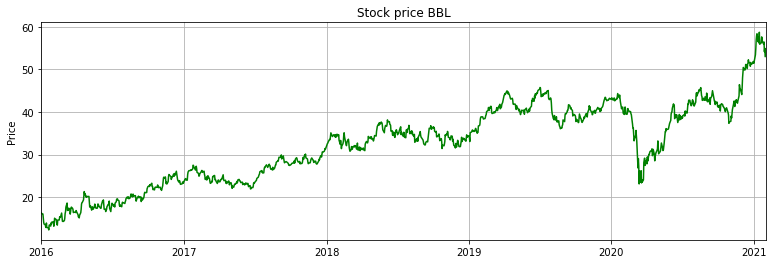

In [4]:
plt.figure(figsize=(13,4))
plt.title('Stock price '+ ticker)
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'], color='g')
plt.show()

In [5]:
y = df['Adj Close'].values.astype(float)

test_size = 7
window_size = 120
train_set = y[:-test_size]
test_set = y[-test_size:]

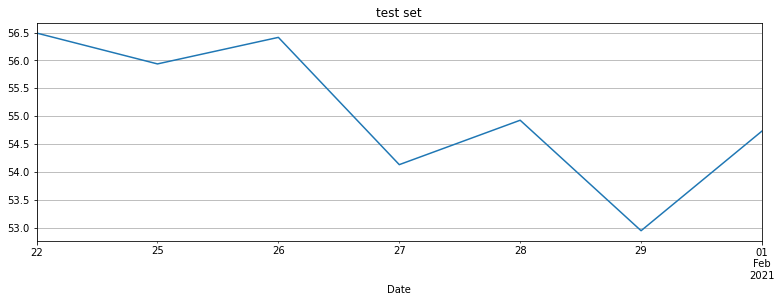

In [6]:
df['Adj Close'].iloc[-test_size:].plot(figsize=(13,4))
plt.title('test set')
plt.grid(True)

# Normalizing data
convert to range [-1, 1]

In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))
test_norm = scaler.transform(test_set.reshape(-1, 1))

In [8]:
train_norm

array([[-0.82627649],
       [-0.83904097],
       [-0.83872968],
       ...,
       [ 0.89337317],
       [ 0.95316775],
       [ 0.93435137]])

In [9]:
test_norm

array([[0.90508127],
       [0.88124699],
       [0.90173601],
       [0.80347218],
       [0.83776001],
       [0.75245851],
       [0.82939701]])

# Input data and label
window size = 120

[1, 2, 3, ...,120] predict ==> [121]

In [10]:
X_train = []
y_train = []
for i in range(window_size, len(train_norm)):
    X_train.append(train_norm[i-120:i,0])
    y_train.append(train_norm[i,0])

X_train,y_train = np.array(X_train), np.array(y_train) 

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(1153, 120, 1)

In [13]:
y_train

array([-0.70822677, -0.78177344, -0.81460129, ...,  0.89337317,
        0.95316775,  0.93435137])

In [14]:
X_test = []
y_test = []

seq = train_norm[-(window_size-1):]

for i in range(len(test_norm)):
    
    seq = np.array(seq[-(window_size-1):], dtype=np.float32)
    
    seq = np.append(seq, test_norm[i])
    
    X_test.append(seq)
    y_test.append(test_norm[i])

X_test,y_test = np.array(X_test), np.array(y_test) 

In [15]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(7, 120, 1)

In [16]:
y_test.shape

(7, 1)

# 1. LSTM network
lstm 6 layers 100 nodes

fully connected 1 l layer

In [23]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
        

# Training
100 epochs

In [15]:
model.fit(X_train, 
          y_train, 
          epochs=100,
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/100
37/37 [==============================] - 9s 257ms/step - loss: 0.0406
Epoch 2/100
37/37 [==============================] - 10s 279ms/step - loss: 0.0297
Epoch 3/100
37/37 [==============================] - 10s 261ms/step - loss: 0.0156
Epoch 4/100
37/37 [==============================] - 9s 254ms/step - loss: 0.0130
Epoch 5/100
37/37 [==============================] - 10s 264ms/step - loss: 0.0110
Epoch 6/100
37/37 [==============================] - 10s 257ms/step - loss: 0.0104
Epoch 7/100
37/37 [==============================] - 9s 250ms/step - loss: 0.0102
Epoch 8/100
37/37 [==============================] - 9s 254ms/step - loss: 0.0101
Epoch 9/100
37/37 [==============================] - 9s 247ms/step - loss: 0.0090
Epoch 10/100
37/37 [==============================] - 9s 250ms/step - loss: 0.0080
Epoch 11/100
37/37 [==============================] - 9s 251ms/step - loss: 0.0079
Epoch 12/100
37/37 [==============================] - 9s 248ms/step - loss: 0.0105
Epoch 13/

# Loss

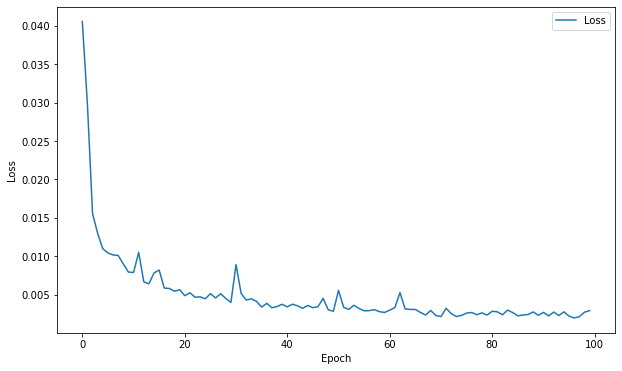

In [17]:
losses = pd.DataFrame(model.history.history['loss'],columns=['loss'])
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

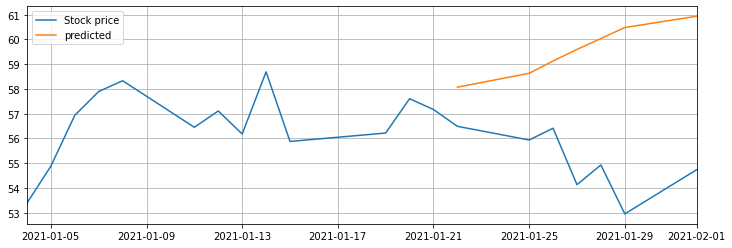

In [18]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error

In [19]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

4.9021721542706

150 epochs

In [19]:
model.fit(X_train, 
          y_train, 
          epochs=150,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/150
37/37 [==============================] - 12s 324ms/step - loss: 0.0365 - val_loss: 0.0731
Epoch 2/150
37/37 [==============================] - 10s 266ms/step - loss: 0.0160 - val_loss: 0.0205
Epoch 3/150
37/37 [==============================] - 10s 272ms/step - loss: 0.0136 - val_loss: 0.0303
Epoch 4/150
37/37 [==============================] - 10s 278ms/step - loss: 0.0135 - val_loss: 0.0069
Epoch 5/150
37/37 [==============================] - 10s 267ms/step - loss: 0.0112 - val_loss: 0.1945
Epoch 6/150
37/37 [==============================] - 10s 263ms/step - loss: 0.0118 - val_loss: 0.1043
Epoch 7/150
37/37 [==============================] - 10s 257ms/step - loss: 0.0082 - val_loss: 0.0401
Epoch 8/150
37/37 [==============================] - 10s 259ms/step - loss: 0.0123 - val_loss: 0.0212
Epoch 9/150
37/37 [==============================] - 9s 254ms/step - loss: 0.0076 - val_loss: 0.0169
Epoch 10/150
37/37 [==============================] - 10s 261ms/step - loss: 0.0071

37/37 [==============================] - 10s 264ms/step - loss: 0.0024 - val_loss: 0.0047
Epoch 81/150
37/37 [==============================] - 10s 267ms/step - loss: 0.0026 - val_loss: 6.9439e-04
Epoch 82/150
37/37 [==============================] - 10s 266ms/step - loss: 0.0025 - val_loss: 3.2373e-04
Epoch 83/150
37/37 [==============================] - 10s 267ms/step - loss: 0.0037 - val_loss: 0.0158
Epoch 84/150
37/37 [==============================] - 10s 262ms/step - loss: 0.0060 - val_loss: 0.0162
Epoch 85/150
37/37 [==============================] - 10s 263ms/step - loss: 0.0029 - val_loss: 2.7572e-04
Epoch 86/150
37/37 [==============================] - 10s 265ms/step - loss: 0.0038 - val_loss: 2.1310e-04
Epoch 87/150
37/37 [==============================] - 10s 263ms/step - loss: 0.0025 - val_loss: 0.0072
Epoch 88/150
37/37 [==============================] - 10s 266ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 89/150
37/37 [==============================] - 10s 258ms/step -

# Loss

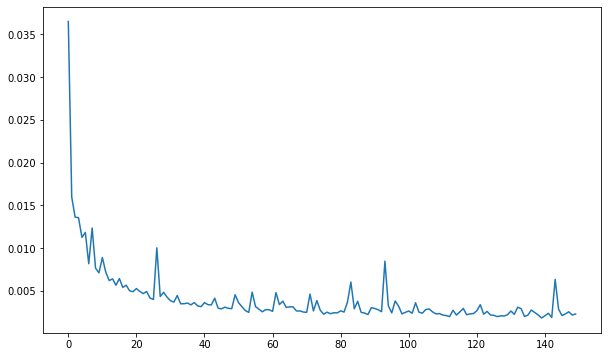

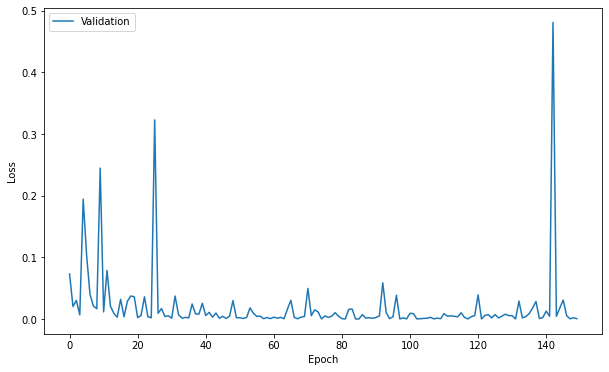

In [20]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

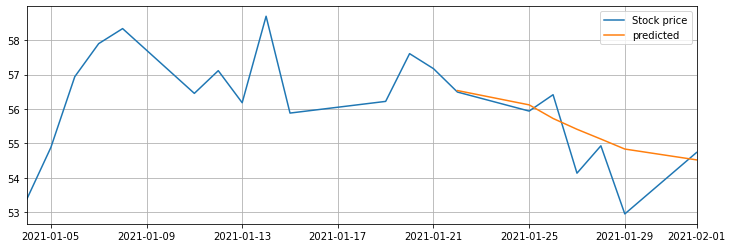

In [21]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error


In [22]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

0.907623812629339

50 epochs

In [24]:
model.fit(X_train, 
          y_train, 
          epochs=50,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/50
37/37 [==============================] - 15s 400ms/step - loss: 0.0382 - val_loss: 0.0342
Epoch 2/50
37/37 [==============================] - 11s 293ms/step - loss: 0.0171 - val_loss: 0.0064
Epoch 3/50
37/37 [==============================] - 11s 294ms/step - loss: 0.0128 - val_loss: 0.0277
Epoch 4/50
37/37 [==============================] - 11s 292ms/step - loss: 0.0118 - val_loss: 0.0060
Epoch 5/50
37/37 [==============================] - 11s 298ms/step - loss: 0.0105 - val_loss: 0.0055
Epoch 6/50
37/37 [==============================] - 11s 300ms/step - loss: 0.0127 - val_loss: 0.0074
Epoch 7/50
37/37 [==============================] - 11s 302ms/step - loss: 0.0103 - val_loss: 0.0183
Epoch 8/50
37/37 [==============================] - 11s 293ms/step - loss: 0.0082 - val_loss: 0.0366
Epoch 9/50
37/37 [==============================] - 11s 300ms/step - loss: 0.0085 - val_loss: 0.0096
Epoch 10/50
37/37 [==============================] - 11s 303ms/step - loss: 0.0099 - val_lo

# Loss

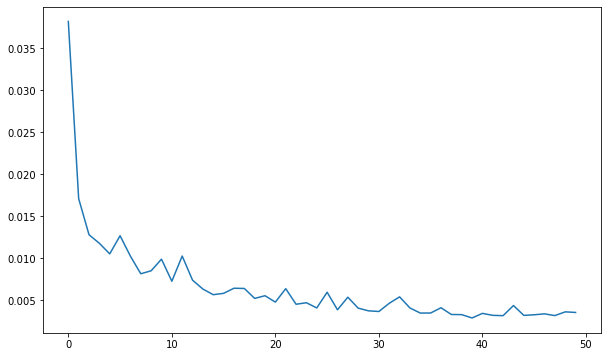

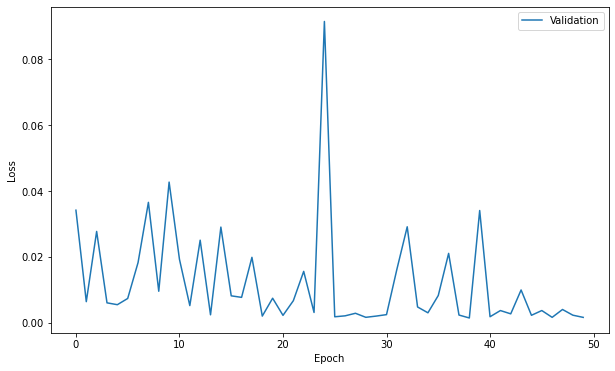

In [25]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

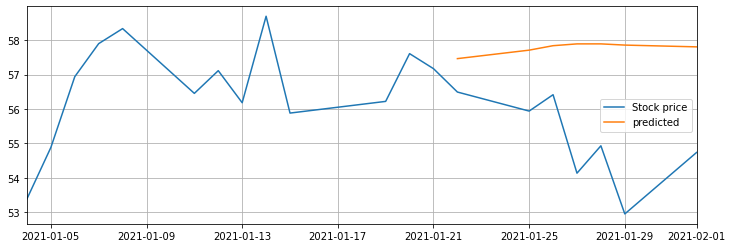

In [26]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error


In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

2.985135954581468

# 2. LSTM network
lstm 4 layers 100 nodes

fully connected 1 l layer

In [32]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=100,))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Training
100 epochs

In [30]:
model.fit(X_train,
          y_train,
          epochs=100,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/100
37/37 [==============================] - 7s 197ms/step - loss: 0.0290 - val_loss: 0.0054
Epoch 2/100
37/37 [==============================] - 6s 161ms/step - loss: 0.0114 - val_loss: 0.0327
Epoch 3/100
37/37 [==============================] - 6s 162ms/step - loss: 0.0112 - val_loss: 0.3554
Epoch 4/100
37/37 [==============================] - 6s 161ms/step - loss: 0.0195 - val_loss: 0.0029
Epoch 5/100
37/37 [==============================] - 6s 163ms/step - loss: 0.0079 - val_loss: 0.0020
Epoch 6/100
37/37 [==============================] - 6s 164ms/step - loss: 0.0075 - val_loss: 0.0360
Epoch 7/100
37/37 [==============================] - 6s 163ms/step - loss: 0.0072 - val_loss: 0.0299
Epoch 8/100
37/37 [==============================] - 6s 162ms/step - loss: 0.0064 - val_loss: 0.0177
Epoch 9/100
37/37 [==============================] - 6s 169ms/step - loss: 0.0065 - val_loss: 0.0085
Epoch 10/100
37/37 [==============================] - 6s 171ms/step - loss: 0.0062 - val_lo

37/37 [==============================] - 6s 164ms/step - loss: 0.0020 - val_loss: 7.9397e-04
Epoch 82/100
37/37 [==============================] - 6s 164ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 83/100
37/37 [==============================] - 6s 164ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 84/100
37/37 [==============================] - 6s 165ms/step - loss: 0.0022 - val_loss: 0.0065
Epoch 85/100
37/37 [==============================] - 6s 163ms/step - loss: 0.0022 - val_loss: 2.5479e-04
Epoch 86/100
37/37 [==============================] - 6s 164ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 87/100
37/37 [==============================] - 6s 165ms/step - loss: 0.0023 - val_loss: 0.0121
Epoch 88/100
37/37 [==============================] - 6s 169ms/step - loss: 0.0022 - val_loss: 0.0095
Epoch 89/100
37/37 [==============================] - 6s 165ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 90/100
37/37 [==============================] - 7s 181ms/step - loss: 0.0021 - va

# Loss

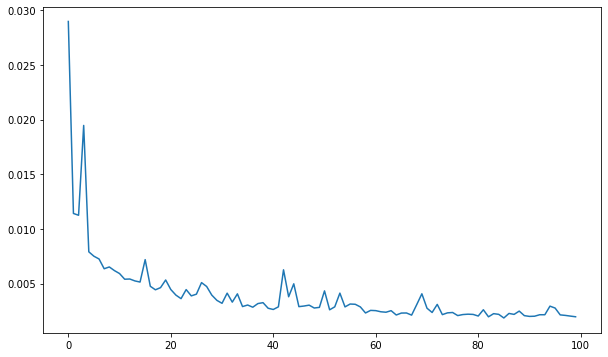

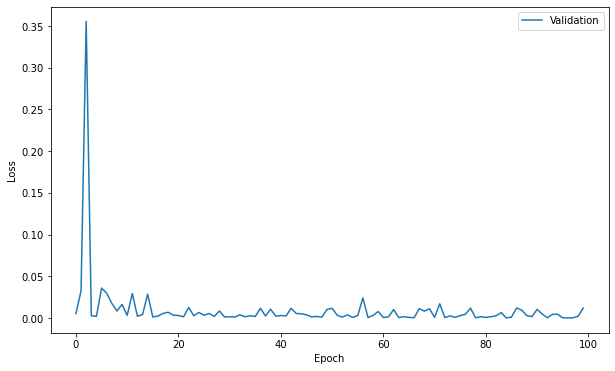

In [34]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

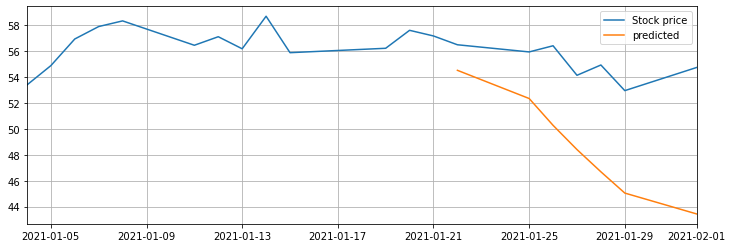

In [35]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error


In [36]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

7.023969917970467

150 epochs

In [33]:
np.random.seed(101)
model.fit(X_train,
          y_train,
          epochs=150,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/150
37/37 [==============================] - 11s 288ms/step - loss: 0.0366 - val_loss: 0.0096
Epoch 2/150
37/37 [==============================] - 9s 246ms/step - loss: 0.0125 - val_loss: 0.0072
Epoch 3/150
37/37 [==============================] - 9s 245ms/step - loss: 0.0098 - val_loss: 0.0203
Epoch 4/150
37/37 [==============================] - 9s 242ms/step - loss: 0.0086 - val_loss: 0.0433
Epoch 5/150
37/37 [==============================] - 9s 240ms/step - loss: 0.0080 - val_loss: 0.0019
Epoch 6/150
37/37 [==============================] - 9s 242ms/step - loss: 0.0084 - val_loss: 0.0019
Epoch 7/150
37/37 [==============================] - 9s 247ms/step - loss: 0.0069 - val_loss: 0.0514
Epoch 8/150
37/37 [==============================] - 9s 244ms/step - loss: 0.0067 - val_loss: 0.1455
Epoch 9/150
37/37 [==============================] - 10s 261ms/step - loss: 0.0066 - val_loss: 0.0033
Epoch 10/150
37/37 [==============================] - 9s 256ms/step - loss: 0.0065 - val_

Epoch 81/150
37/37 [==============================] - 9s 246ms/step - loss: 0.0021 - val_loss: 0.0054
Epoch 82/150
37/37 [==============================] - 9s 246ms/step - loss: 0.0022 - val_loss: 0.0087
Epoch 83/150
37/37 [==============================] - 9s 247ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 84/150
37/37 [==============================] - 9s 248ms/step - loss: 0.0024 - val_loss: 4.1246e-04
Epoch 85/150
37/37 [==============================] - 9s 248ms/step - loss: 0.0021 - val_loss: 0.0072
Epoch 86/150
37/37 [==============================] - 9s 246ms/step - loss: 0.0024 - val_loss: 0.0041
Epoch 87/150
37/37 [==============================] - 9s 246ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 88/150
37/37 [==============================] - 9s 248ms/step - loss: 0.0028 - val_loss: 3.1430e-04
Epoch 89/150
37/37 [==============================] - 9s 246ms/step - loss: 0.0023 - val_loss: 8.0031e-04
Epoch 90/150
37/37 [==============================] - 9s 248ms/step - 

# Loss

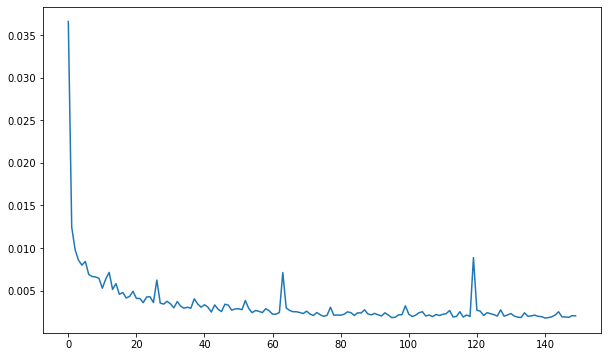

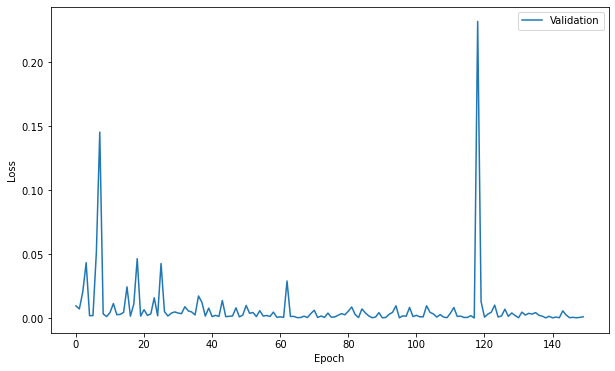

In [34]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Testing

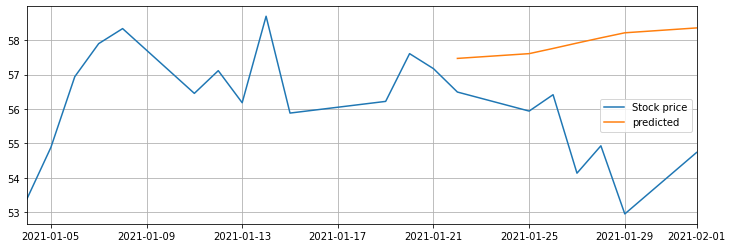

In [35]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

# Absolute mean squared error


In [36]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

3.170531483075519

# 3. LSTM network
lstm 2 layers 100 nodes

fully connected 1 l layer

In [44]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=100,))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

150 epochs

In [38]:
np.random.seed(101)
model.fit(X_train,
          y_train,
          epochs=150,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/150
37/37 [==============================] - 5s 131ms/step - loss: 0.0188 - val_loss: 0.0126
Epoch 2/150
37/37 [==============================] - 4s 113ms/step - loss: 0.0048 - val_loss: 0.0078
Epoch 3/150
37/37 [==============================] - 4s 114ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 4/150
37/37 [==============================] - 4s 113ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 5/150
37/37 [==============================] - 4s 111ms/step - loss: 0.0035 - val_loss: 0.0119
Epoch 6/150
37/37 [==============================] - 4s 113ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 7/150
37/37 [==============================] - 5s 131ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 8/150
37/37 [==============================] - 5s 122ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 9/150
37/37 [==============================] - 4s 121ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 10/150
37/37 [==============================] - 5s 123ms/step - loss: 0.0028 - val_lo

37/37 [==============================] - 4s 111ms/step - loss: 0.0016 - val_loss: 1.1257e-04
Epoch 81/150
37/37 [==============================] - 4s 113ms/step - loss: 0.0018 - val_loss: 7.8482e-04
Epoch 82/150
37/37 [==============================] - 4s 113ms/step - loss: 0.0017 - val_loss: 1.2194e-04
Epoch 83/150
37/37 [==============================] - 4s 110ms/step - loss: 0.0016 - val_loss: 4.6260e-04
Epoch 84/150
37/37 [==============================] - 4s 112ms/step - loss: 0.0016 - val_loss: 6.0756e-04
Epoch 85/150
37/37 [==============================] - 4s 111ms/step - loss: 0.0021 - val_loss: 5.2365e-04
Epoch 86/150
37/37 [==============================] - 4s 114ms/step - loss: 0.0017 - val_loss: 4.2677e-04
Epoch 87/150
37/37 [==============================] - 4s 112ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 88/150
37/37 [==============================] - 4s 112ms/step - loss: 0.0018 - val_loss: 8.5150e-04
Epoch 89/150
37/37 [==============================] - 4s 113ms/

# Loss

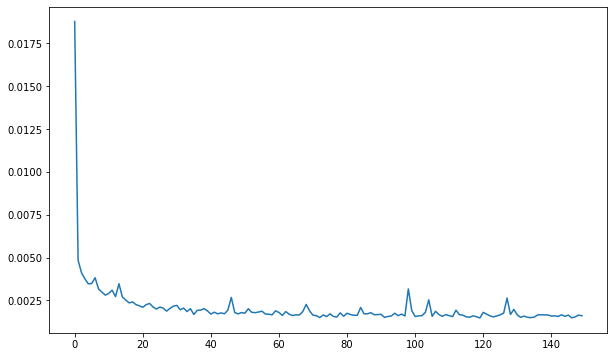

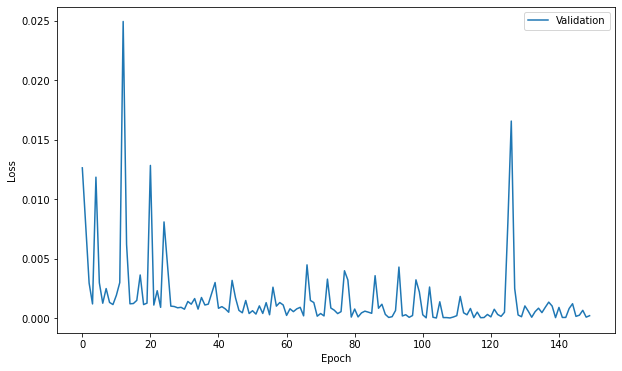

In [41]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

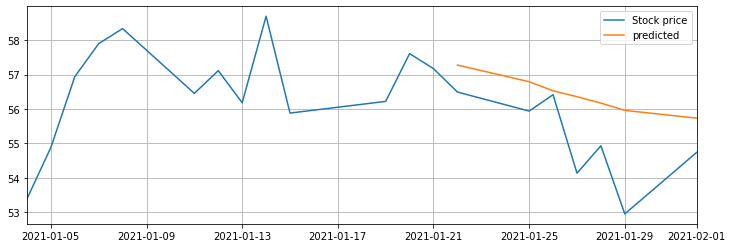

In [42]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

In [43]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

1.5969158869751903

In [45]:
np.random.seed(101)
model.fit(X_train,
          y_train,
          epochs=50,
          validation_data=(X_test, y_test),
          batch_size=32 )
model.save_weights(f'model/{ticker}.h5')

Epoch 1/50
37/37 [==============================] - 5s 128ms/step - loss: 0.0175 - val_loss: 0.0507
Epoch 2/50
37/37 [==============================] - 4s 103ms/step - loss: 0.0049 - val_loss: 0.0138
Epoch 3/50
37/37 [==============================] - 4s 104ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 4/50
37/37 [==============================] - 4s 103ms/step - loss: 0.0044 - val_loss: 0.0058
Epoch 5/50
37/37 [==============================] - 4s 109ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 6/50
37/37 [==============================] - 4s 100ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 7/50
37/37 [==============================] - 4s 99ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 8/50
37/37 [==============================] - 4s 98ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 9/50
37/37 [==============================] - 4s 100ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 10/50
37/37 [==============================] - 4s 102ms/step - loss: 0.0030 - val_loss: 0.0110
E

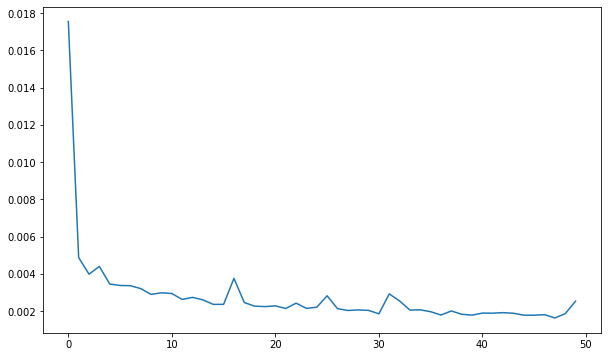

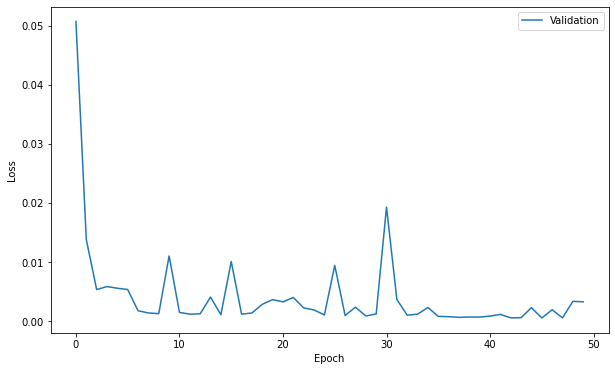

In [46]:
losses = pd.DataFrame(model.history.history)
losses['loss'].plot(figsize=(10,6), label='Loss');
plt.show()
losses['val_loss'].plot(figsize=(10,6), label='Validation');
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

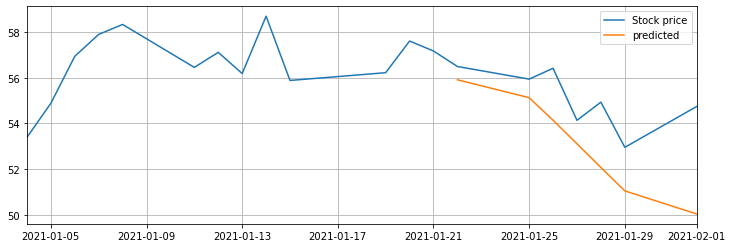

In [47]:
model.load_weights(f'model/{ticker}.h5')
future = 7
window_size = 120
preds = train_norm[-window_size:].tolist()

for i in range(future):
    seq = np.array(preds[-window_size:], dtype=np.float32)
    seq = np.reshape(seq, (seq.shape[1], seq.shape[0], 1))
    predict = model.predict(seq)
    preds.append(predict)

true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
df1 = pd.DataFrame(true_predictions, index=df.tail(7).index, columns=['pred'])


plt.figure(figsize=(12,4))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'].iloc[-20:], label='Stock price')
plt.plot(df1['pred'], label='predicted')
plt.legend()

In [48]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(true_predictions.reshape(1, -1), df['Adj Close'][-7:].values.reshape(1, -1)))

2.424344802653559